In [20]:
import numpy as np
from scipy.integrate import solve_ivp
import matplotlib.pyplot as plt


sigmas = [1.5, 10.0, 20.0]

cs = [1 / (4 * sigma) for sigma in sigmas]


z_span = (0.0, 10.0)
z_eval = np.linspace(z_span[0], z_span[1], 400)

def f(z, y, c):
    u, uz = y
    uzz = -c * uz - u * (1.0 - u)
    return [uz, uzz]


def u0_z(z, sigma):
    return 1.0 / (1.0 + np.exp(-4.0 * sigma * z))

def u0z_prime_at_0(sigma):
    return sigma


/var/folders/xd/6b7x17ts5b7612cqwyl3b63m0000gp/T/ipykernel_27789/3324634455.py:8: RuntimeWarning: overflow encountered in exp
  u_vals = 1.0 / (1.0 + np.exp(-4.0 * sigma * z_vals))


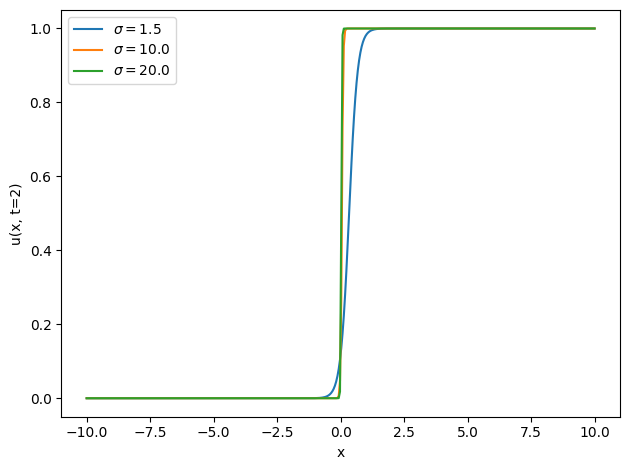

In [21]:
# plot u vs x
x_vals = np.linspace(-10.0, 10.0, 400)
t = 2.0  # fixed time
plt.figure()
for sigma in sigmas:
    c = 1 / (4 * sigma)
    z_vals = x_vals - c * t
    u_vals = 1.0 / (1.0 + np.exp(-4.0 * sigma * z_vals))
    plt.plot(x_vals, u_vals, label=fr'$\sigma = {sigma}$')
plt.xlabel("x")
plt.ylabel("u(x, t=2)")
plt.legend()
plt.tight_layout()
plt.show()

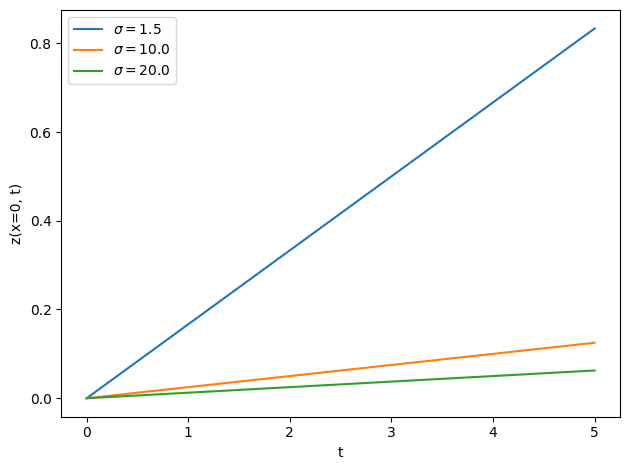

In [22]:
# plot z vs t for different sigmas
t_vals = np.linspace(0.0, 5.0, 400)
x_fixed = 0.0  # fixed position
plt.figure()
for sigma in sigmas:
    c = 1 / (4 * sigma)
    z_vals = x_fixed - c * t_vals
    u_vals = 1.0 / (1.0 + np.exp(-4.0 * sigma * z_vals))
    plt.plot(t_vals, abs(z_vals), label=fr'$\sigma = {sigma}$')
plt.xlabel("t")

plt.ylabel("z(x=0, t)")
plt.legend()
plt.tight_layout()
plt.show()